In [1]:
# This project compares Randon Forest and Linear Regression in Comparing stroke prediction
import pandas as pd
import numpy as np

In [2]:
# assigning data as a variable
data = pd.read_csv ("C:\\Users\\olufu\\Downloads\\kaggledata\\stroke_data.csv")  # use any dataset you want

In [3]:
# determining number of rows and columns
data.shape

(40910, 11)

In [4]:
# viewing 1st five rows of the dataset
data.head()

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,63.0,0,1,1,4,1,228.69,36.6,1,1
1,1.0,42.0,0,1,1,4,0,105.92,32.5,0,1
2,0.0,61.0,0,0,1,4,1,171.23,34.4,1,1
3,1.0,41.0,1,0,1,3,0,174.12,24.0,0,1
4,1.0,85.0,0,0,1,4,1,186.21,29.0,1,1


In [5]:
# shows data statistics mean, std, min and max
data.describe()

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,40907.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000
mean,0.555162,51.327255,0.213835,0.127719,0.821340,3.461134,0.514886,122.075901,30.406355,0.488609,0.500122
std,0.496954,21.623969,0.410017,0.333781,0.383072,0.780919,0.499784,57.561531,6.835072,0.499876,0.500006
min,0.000000,-9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,11.500000,0.000000,0.000000
25%,0.000000,35.000000,0.000000,0.000000,1.000000,3.000000,0.000000,78.750000,25.900000,0.000000,0.000000
50%,1.000000,52.000000,0.000000,0.000000,1.000000,4.000000,1.000000,97.920000,29.400000,0.000000,1.000000
75%,1.000000,68.000000,0.000000,0.000000,1.000000,4.000000,1.000000,167.590000,34.100000,1.000000,1.000000
max,1.000000,103.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,92.000000,1.000000,1.000000


In [6]:
# shows dataset type whether int float or string 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40910 entries, 0 to 40909
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                40907 non-null  float64
 1   age                40910 non-null  float64
 2   hypertension       40910 non-null  int64  
 3   heart_disease      40910 non-null  int64  
 4   ever_married       40910 non-null  int64  
 5   work_type          40910 non-null  int64  
 6   Residence_type     40910 non-null  int64  
 7   avg_glucose_level  40910 non-null  float64
 8   bmi                40910 non-null  float64
 9   smoking_status     40910 non-null  int64  
 10  stroke             40910 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 3.4 MB


<Axes: xlabel='stroke'>

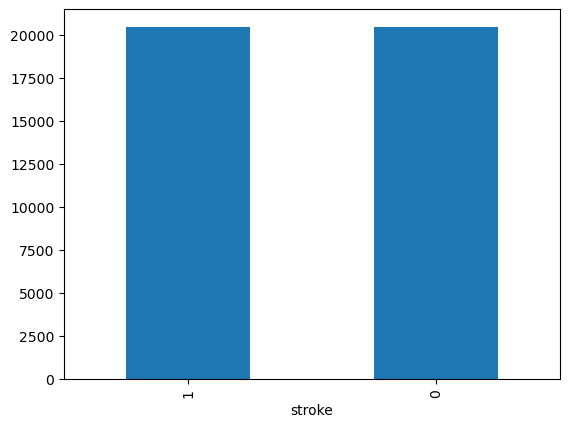

In [7]:
# checking for class imbalance, below implies that class is balance(very important for Machine Learning)
data['stroke'].value_counts().plot(kind='bar')

In [8]:
# calculating the percentage of missing values (NaN or None) in each column of a pandas DataFrame 
# if missing rate is > 0.05, we can either drop that column or we can manipulate to fill the missing data using appropriate imputation method
data.isna().mean()

sex                  0.000073
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  0.000000
smoking_status       0.000000
stroke               0.000000
dtype: float64

In [9]:
# Calculate the mean of the column and use it to fill the missing values (sex in this case)
mean_age = data['sex'].mean(skipna=True)

# Replace missing values with the calculated mean
data['sex'].fillna(mean_age, inplace=True)


In [10]:
# count (sex column is not complete)
data.count()

sex                  40910
age                  40910
hypertension         40910
heart_disease        40910
ever_married         40910
work_type            40910
Residence_type       40910
avg_glucose_level    40910
bmi                  40910
smoking_status       40910
stroke               40910
dtype: int64

In [11]:
# code below calculates and removes outliers that have threshold = 3 * std

numeric_df = data.applymap(pd.to_numeric, errors='coerce')  # Convert all values to numeric, ignoring errors

condition = numeric_df < 0.0001  # Applying the condition to all columns

# Iterate through each column in the DataFrame
for column_name in data.columns:
    # Calculate the mean and standard deviation
    mean = data.loc[condition[column_name], column_name].mean()
    std = data.loc[condition[column_name], column_name].std()

    # Define the outlier threshold
    threshold = 3 * std

    # Detect outliers
    outliers = data.loc[condition[column_name], column_name][(data.loc[condition[column_name], column_name] < mean - threshold) | (data.loc[condition[column_name], column_name] > mean + threshold)]

    data = data.drop(outliers.index)

In [12]:
# Normalization - we normlize the Avg_glucose_level, BMI and age for uniformity of weight assignment to all features
from sklearn.preprocessing import MinMaxScaler

# Assuming 'data' is your DataFrame and 'columns_to_scale' is a list of column names you want to scale and round.
columns_to_scale = ['bmi', 'avg_glucose_level', 'age']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Scale and round the specified columns
for column in columns_to_scale:
    data[column] = scaler.fit_transform(data[[column]])
    data[column] = data[column].round(2)

In [13]:
# now that there is no missing values in dataset and outliers have being removed, dataset is cleaned
# data can be split into 80:20 train test split

In [14]:
y=data['stroke']  # our target is the variable we want to predict, that is y (stroke)
y.head()

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

In [15]:
X=data.drop('stroke', axis=1) # these are the independent variables
X.head()

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1.0,0.63,0,1,1,4,1,0.80,0.31,1
1,1.0,0.44,0,1,1,4,0,0.23,0.26,0
2,0.0,0.61,0,0,1,4,1,0.54,0.28,1
3,1.0,0.43,1,0,1,3,0,0.55,0.16,0
4,1.0,0.83,0,0,1,4,1,0.61,0.22,1


In [16]:
from sklearn.model_selection import train_test_split  # splits the data into test/train in ratio of 80/20
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=100)

In [17]:
# Model building
#Import Linear regression from sklearn
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [18]:
y_lr_train_pred=lr.predict(X_train)   #makes prediction on train and test datasets using the Linear regression model
y_lr_test_pred=lr.predict(X_test)

y_lr_train_pred

array([0.40023785, 0.81589088, 0.24803141, ..., 0.97008628, 1.0868393 ,
       0.41737755])

In [19]:
y_lr_test_pred

array([0.6357526 , 0.2948561 , 0.32476925, ..., 0.9778769 , 0.4227817 ,
       0.52132118])

In [20]:
y_train

24496    0
11662    1
20964    0
30026    0
13521    1
        ..
16305    1
79       1
12120    1
14148    1
38409    0
Name: stroke, Length: 32727, dtype: int64

In [21]:
from sklearn.metrics import mean_squared_error, r2_score   #Evaluation of LR model

lr_train_mse=mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2=r2_score(y_train, y_lr_train_pred)

lr_test_mse=mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2=r2_score(y_test, y_lr_test_pred)

print('lr_train_mse:', lr_train_mse)
print('lr_train_r2:', lr_train_r2)
print('lr_test_mse:', lr_test_mse)
print('lr_test_r2:', lr_test_r2)

lr_train_mse: 0.20717868282443158
lr_train_r2: 0.1712750359205737
lr_test_mse: 0.20955776259226608
lr_test_r2: 0.16157637994382923


In [22]:
#interpretation of result
#These values suggest that your linear regression model may not be performing exceptionally well; 
#there's room for improvement. If you're using this for a project or analysis, 
#you might want to explore other models or fine-tune your current one to enhance its predictive capabilities.

In [23]:
lr_results=pd.DataFrame(['Linear Regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns=['method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

In [24]:
# using Random Forest method

In [25]:
from sklearn.model_selection import GridSearchCV    # performing grid search to know the best hyperparameter tuning
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'max_depth': [2, 4, 6, 8, 10],
    'n_estimators': [50],
    'random_state': [100]
}


# Create a Random Forest Classifier
rf = RandomForestClassifier()

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_rf = grid_search.best_estimator_

# You can now use 'best_rf' for predictions on your test set
y_rf_train_pred = best_rf.predict(X_test)

Best Hyperparameters: {'max_depth': 10, 'n_estimators': 50, 'random_state': 100}


In [26]:
y_rf_train_pred=best_rf.predict(X_train)
y_rf_train_pred

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [27]:
y_rf_test_pred=best_rf.predict(X_test)
y_rf_test_pred

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [28]:
rf_train_mse=mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2=r2_score(y_train, y_lr_train_pred)

rf_test_mse=mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2=r2_score(y_test, y_rf_test_pred)

print('rf_train_mse:', rf_train_mse)
print('rf_train_r2:', rf_train_r2)
print('rf_test_mse:', rf_test_mse)
print('rf_test_r2:', rf_test_r2)

rf_train_mse: 0.14110673144498426
rf_train_r2: 0.1712750359205737
rf_test_mse: 0.1462967489611342
rf_test_r2: 0.4146785671447619


Variance in a dataset refers to the amount by which individual data points in the set differ from the mean (average) of the dataset. High variance indicates that the data points are spread out over a large range, while low variance indicates that the data points are closer to the mean.

Several factors can contribute to variance in a dataset:

1. **Inherent Variability in the Phenomenon:** Some phenomena naturally exhibit a high degree of variability. For example, human behavior can be highly variable, leading to variance in datasets related to human activities.

2. **Data Collection Methods:** The method used to collect data can introduce variance. If the data collection process is not consistent or if there are errors in measurement, it can contribute to variability in the dataset.

3. **Sample Size:** Smaller sample sizes tend to have higher variance. With fewer data points, each individual point has a greater impact on the overall variance.

4. **Outliers:** Outliers, or extreme values, can significantly affect variance. Outliers can result from errors in data collection or may represent genuine extreme observations.

5. **Noise in the Data:** Random noise, or fluctuations that are not representative of the underlying pattern, can contribute to variance. This is especially true in situations where the phenomenon being measured is influenced by random factors.

6. **Complexity of the Phenomenon:** If the underlying phenomenon being studied is complex and influenced by multiple factors, it can lead to higher variance. Complex systems often exhibit more variability in their behavior.

Reducing variance is a key goal in statistical modeling and machine learning. Techniques such as regularization, cross-validation, and feature selection can help mitigate variance and improve the generalization performance of models. It's essential to strike a balance between bias and variance to create models that perform well on both training and unseen data.